# Part 0: Set-up

In [63]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS1-Ava/main/data/references.csv")
df

Item type                                            Authors  \
0   Conference Paper  González-González CS,García-Holgado A,de los A...   
1    Journal Article                              Correll S,Mackenzie L   
2    Journal Article                                       Bebbington D   
3    Journal Article                                  Powell C,Chang AM   
4    Journal Article                               Kuschel K,Lepeley MT   
5   Conference Paper                             Holtzblatt K,Marsden N   
6    Journal Article                           Del Carpio L,Guadalupe M   
7    Journal Article                              Lemons MA,Parzinger M   
8               Book                         Hill C,Corbett C,St Rose A   
9    Journal Article                                   Cronin C,Roger A   
10   Journal Article                         Orser B,Riding A,Stanley J   
11   Journal Article                                          Wajcman J   
12   Journal Article                                 Wynn AT,Correll SJ   
13   Journal Article                                     Hay R,Pearce P   
14   Journal Article                                        Fountain JE   
15   Journal Article                             Lemons MA,Parzinger MJ   
16   Journal Article                           Bhattacharyya A,Ghosh BN   
17   Journal Article                                          Trauth EM   

                                                Title  \
0   Gender and engineering: Developing actions to ...   
1      To succeed in tech, women need more visibility   
2   Women in science, engineering and technology: ...   
3   Women in tech as a driver for growth in emergi...   
4   Women start-ups in technology: Literature revi...   
5                       Retaining women in technology   
6   More women in tech? Evidence from a field expe...   
7   Gender schemas: A cognitive explanation of dis...   
8   Why so few? Women in science, technology, engi...   
9   Theorizing progress: Women in science, enginee...   
10  Perceived career challenges and response strat...   
11  Technocapitalism meets technofeminism: women a...   
12  Puncturing the pipeline: Do technology compani...   
13  Technology adoption by rural women in Queensla...   
14  Constructing the information society: women, i...   
15  Designing women: A qualitative study of the gl...   
16  Women in Indian information technology (IT) se...   
17  Odd girl out: an individual differences perspe...   

                                              Journal  Publication year  \
0                                                 NaN              2018   
1                             Harvard Business Review              2016   
2                          Higher education quarterly              2002   
3                        Council on Foreign Relations              2016   
4   International Journal of Entrepreneurship and ...              2016   
5                                                 NaN              2018   
6                                  Management Science              2022   
7                  Journal of Business and Psychology              2007   
8                                                 NaN              2010   
9   Journal of Research in Science Teaching: The O...              1999   
10            Entrepreneurship & Regional Development              2012   
11  Labour & Industry: a journal of the social and...              2006   
12                          Social studies of science              2018   
13                           Journal of Rural Studies              2014   
14                              Technology in society              2000   
15                    SAM Advanced Management Journal              2001   
16      IOSR Journal of Humanities and Social Science              2012   
17                    Information Technology & People              2002   

    Volume Issue      Pages Institution  \
0      NaN   NaN  2082-2087     

# Part I The World Cloud

## 1.1. Title

In [72]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Gender and engineering: Developing actions to encourage women in tech,To succeed in tech, women need more visibility,Women in science, engineering and technology: A review of the issues,Women in tech as a driver for growth in emerging economies,Women start-ups in technology: Literature review and research agenda to improve participation,Retaining women in technology,More women in tech? Evidence from a field experiment addressing social identity,Gender schemas: A cognitive explanation of discrimination of women in technology,Why so few? Women in science, technology, engineering, and mathematics,Theorizing progress: Women in science, engineering, and technology in higher education,Perceived career challenges and response strategies of women in the advanced technology sector,Technocapitalism meets technofeminism: women and technology in a wireless world,Puncturing the pipeline: Do technology companies alienate women in recruiting sessions?,Technology adoption by rural women in Queensland

In [73]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review",])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [75]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

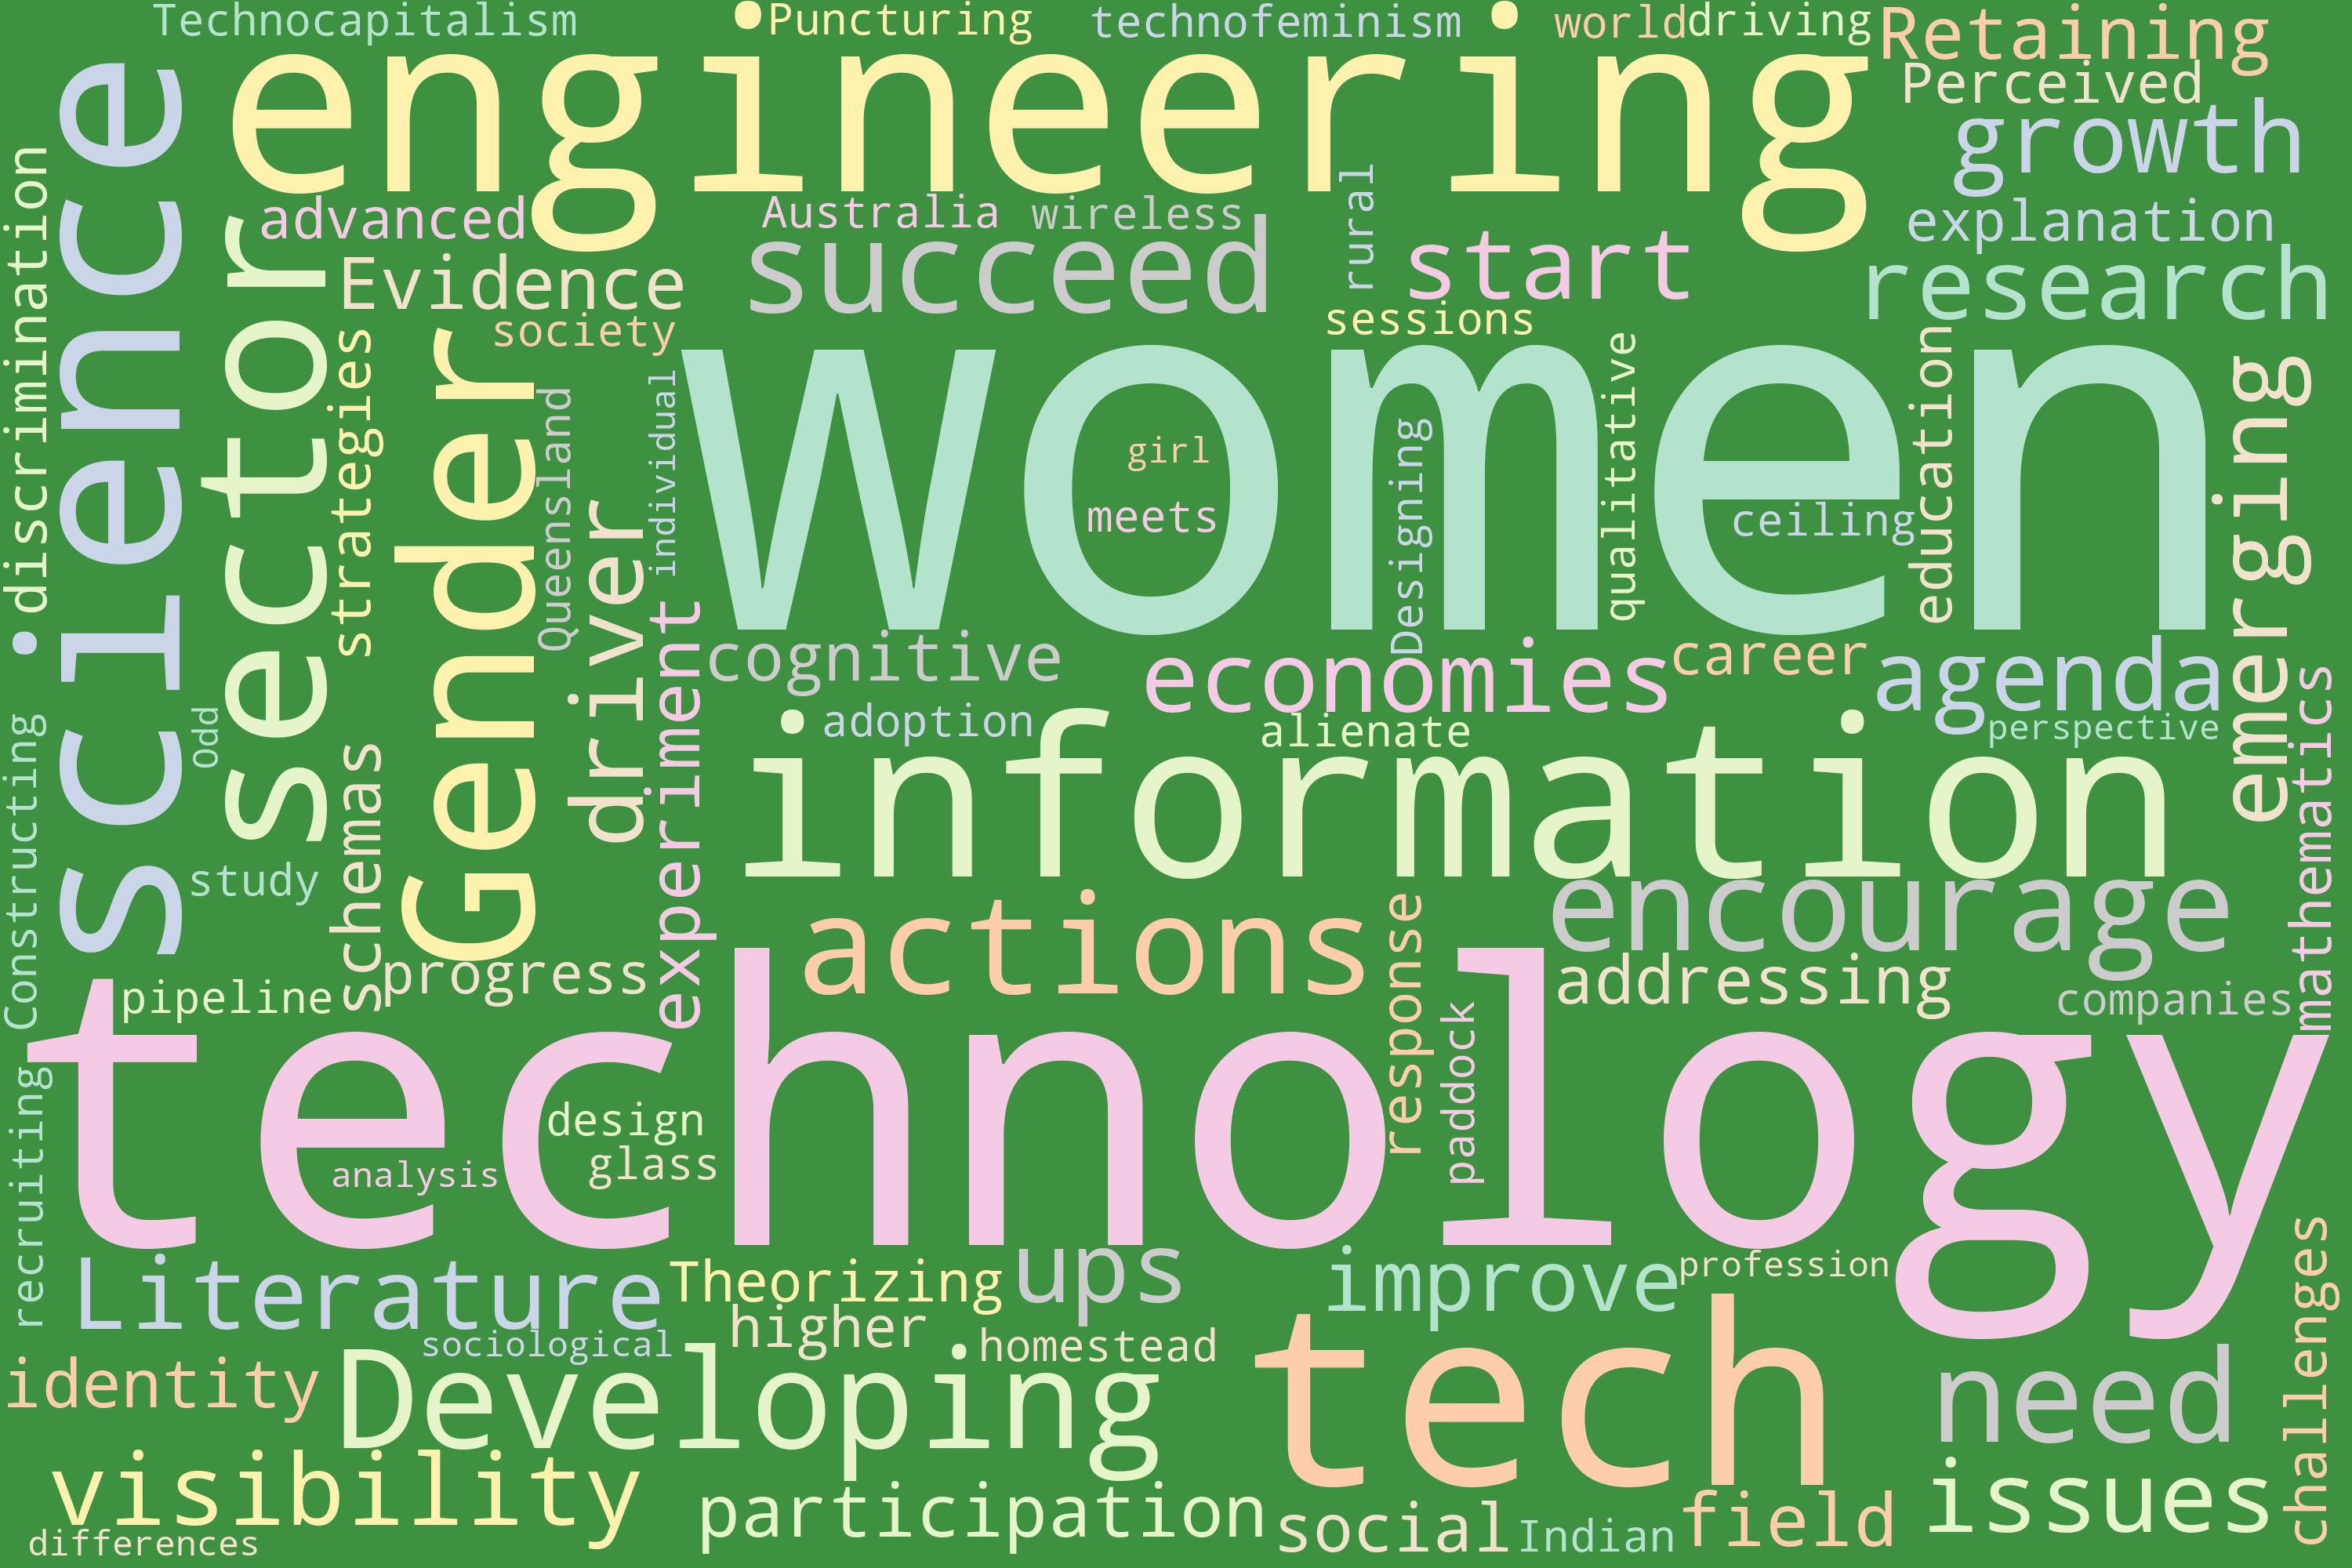

In [76]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

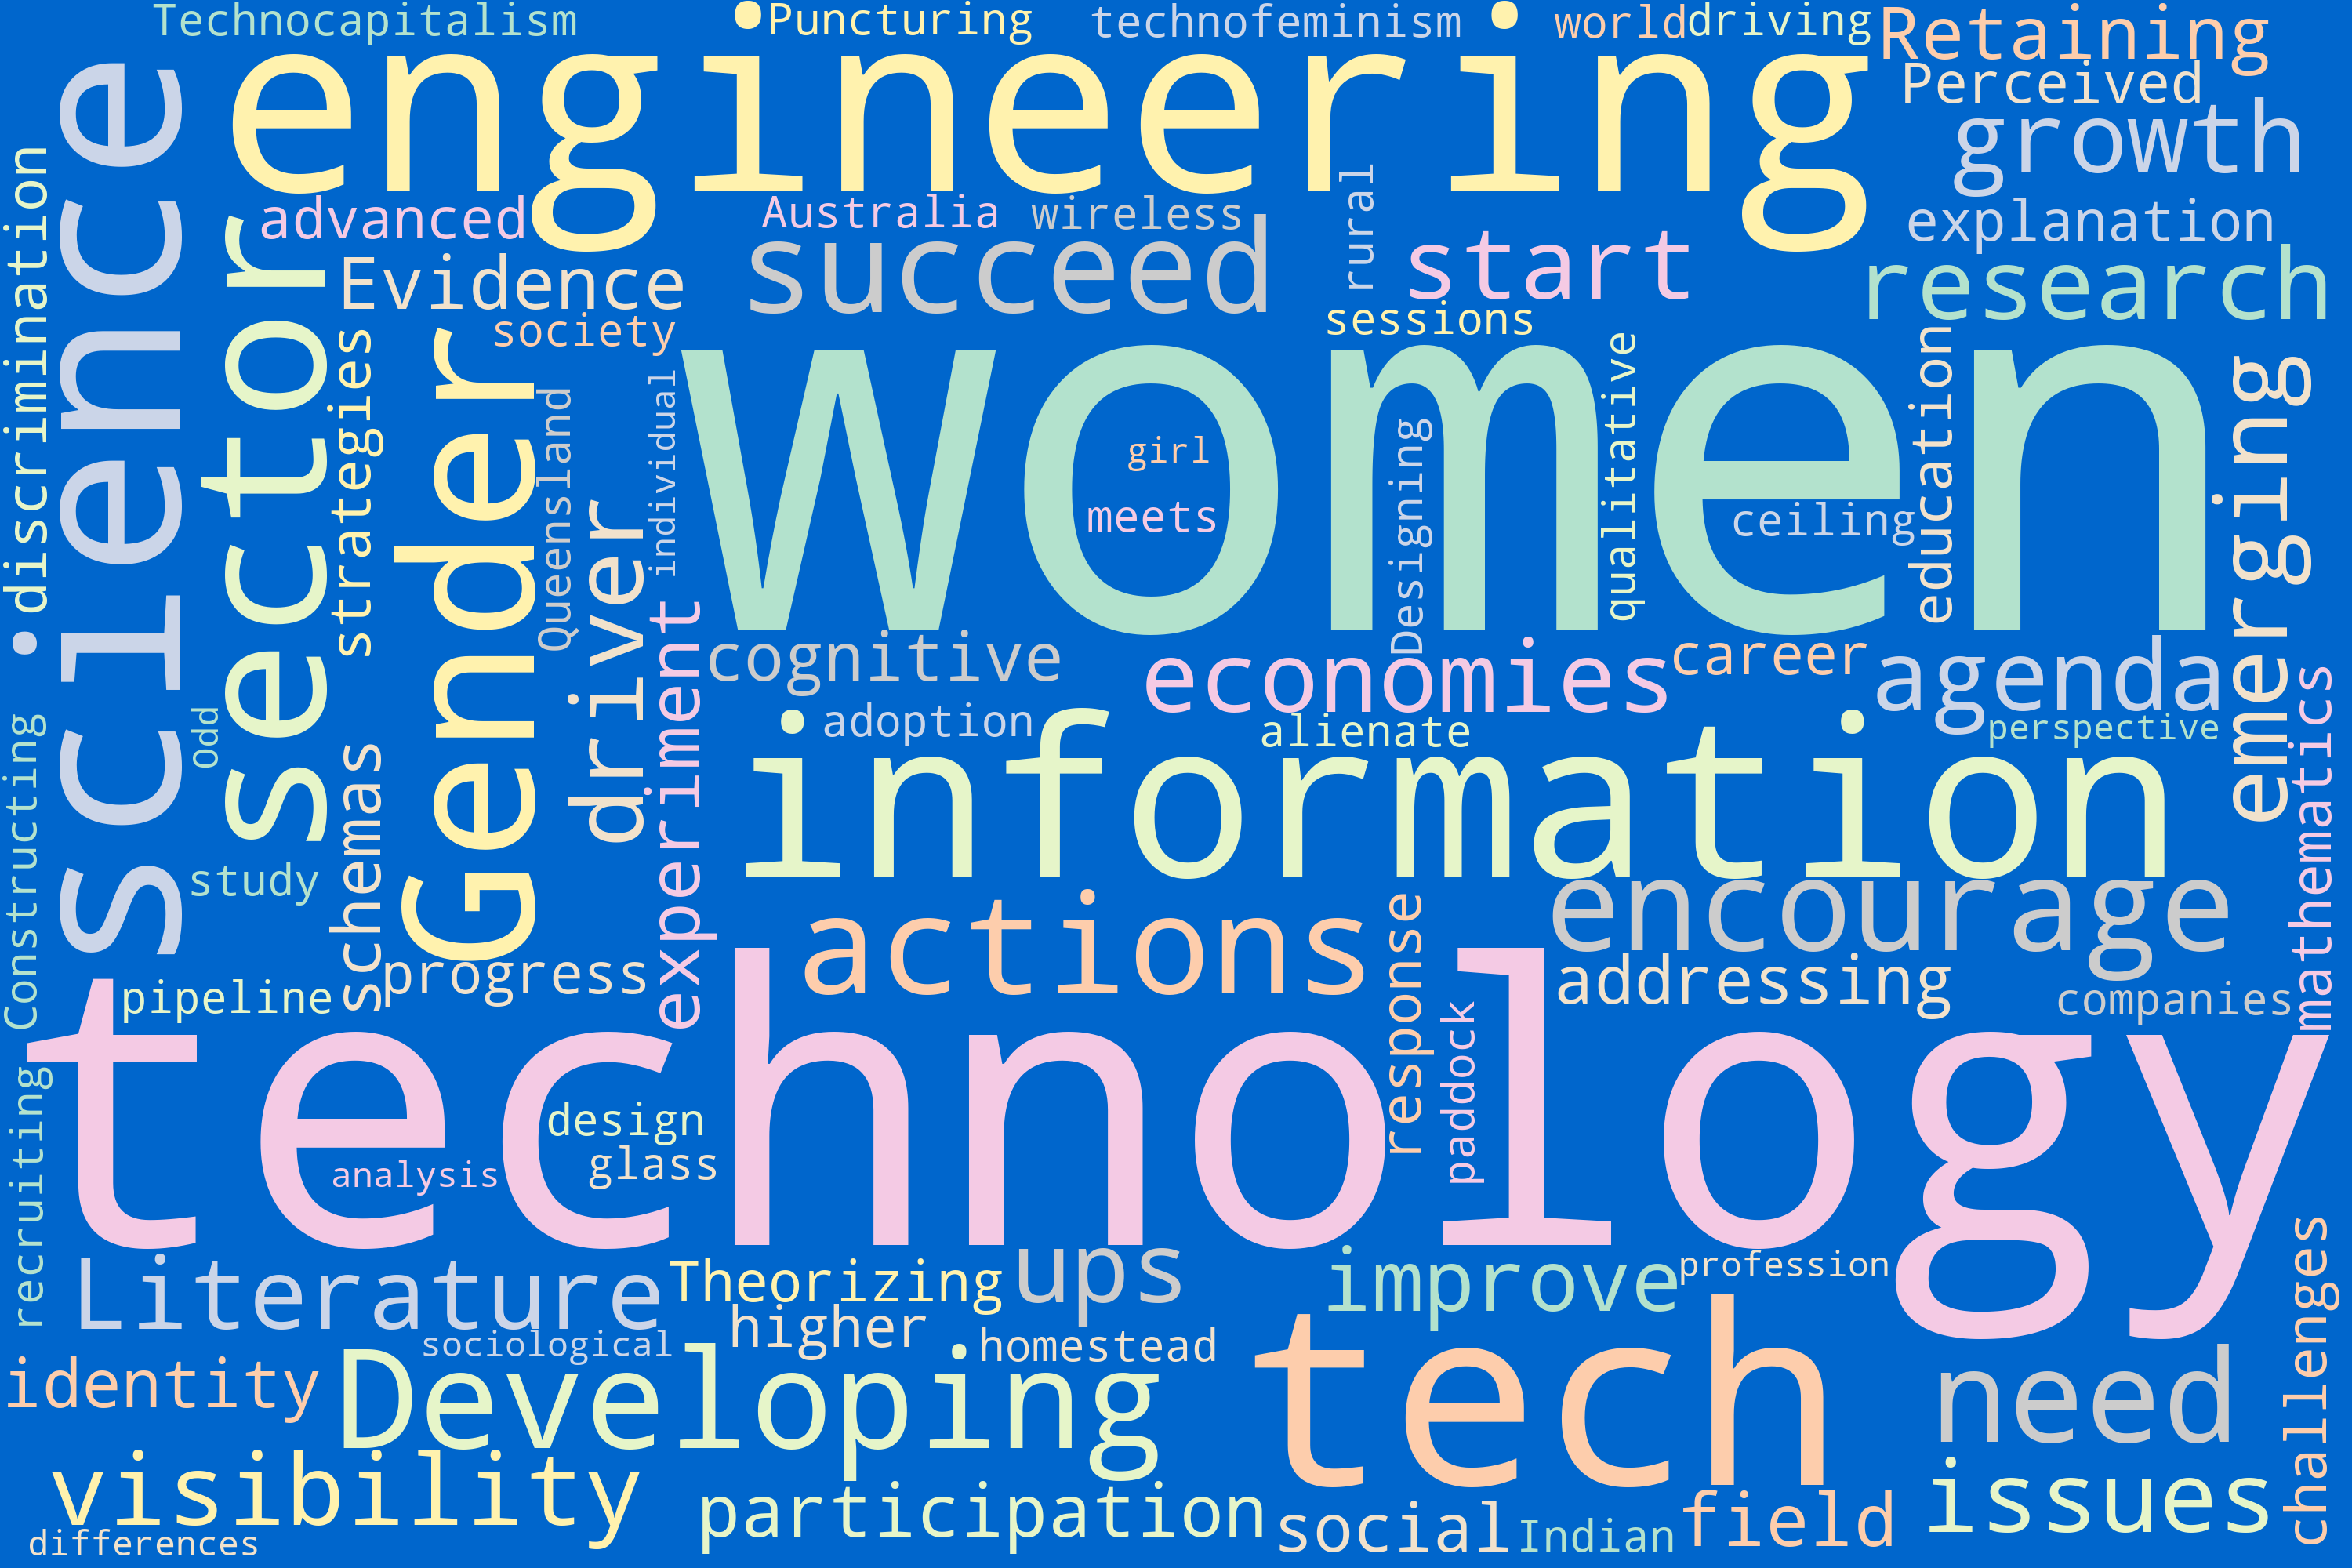

In [77]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [78]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"There is a social and economic concern for the low representativeness of women in the technology industry. The timeline of recent years shows a drop in the interest of women in studying a career related to science, technology, engineering and mathematics (STEM), just when the demand labor in these fields is growing rapidly and new jobs will continue to emerge, and it is feared that they will not have enough people to cover It There are many social organizations that are taking measures to alleviate this situation, including educational branches, government agencies, industry and technological communities composed of women. In this research, the cases of industry and communities are studied. It is intended to dissect how these two ecosystems work to strengthen mechanisms that minimize the gender gap. On the one hand, the paper addresses, what are the communities, why they arise, what are their objectives, what they contribute to society and what actions they develop to contain the prob

In [79]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

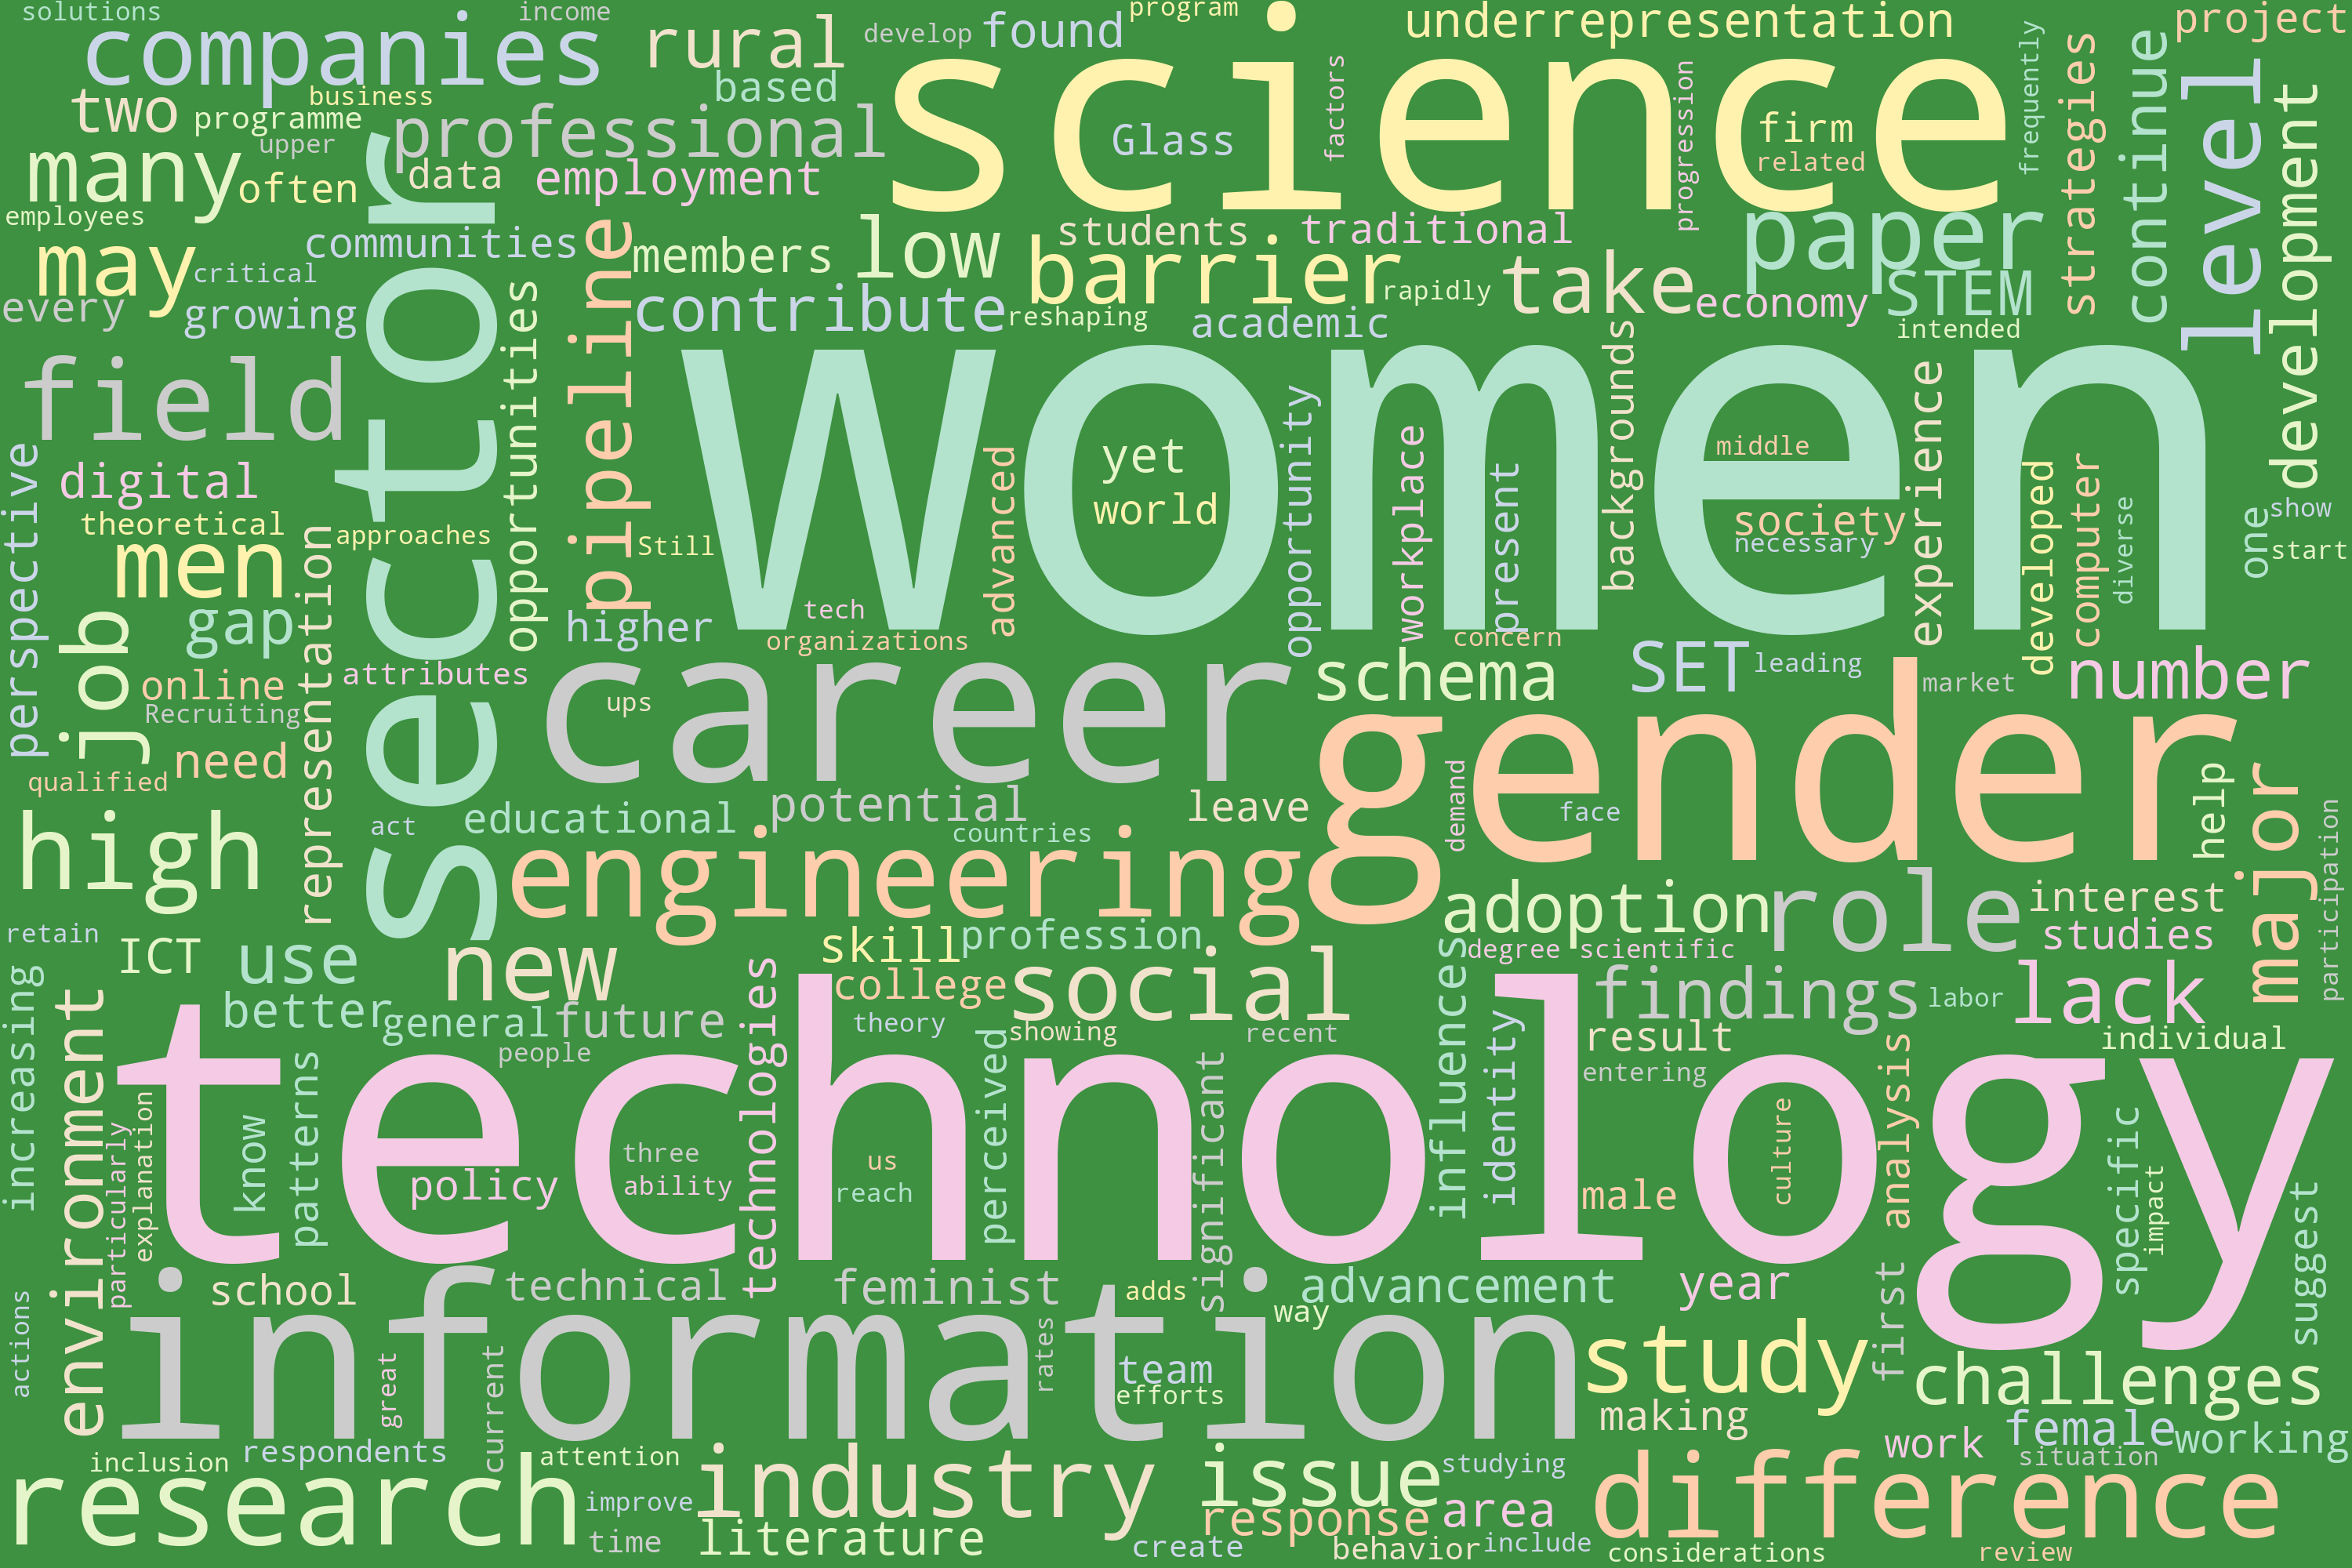

In [80]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

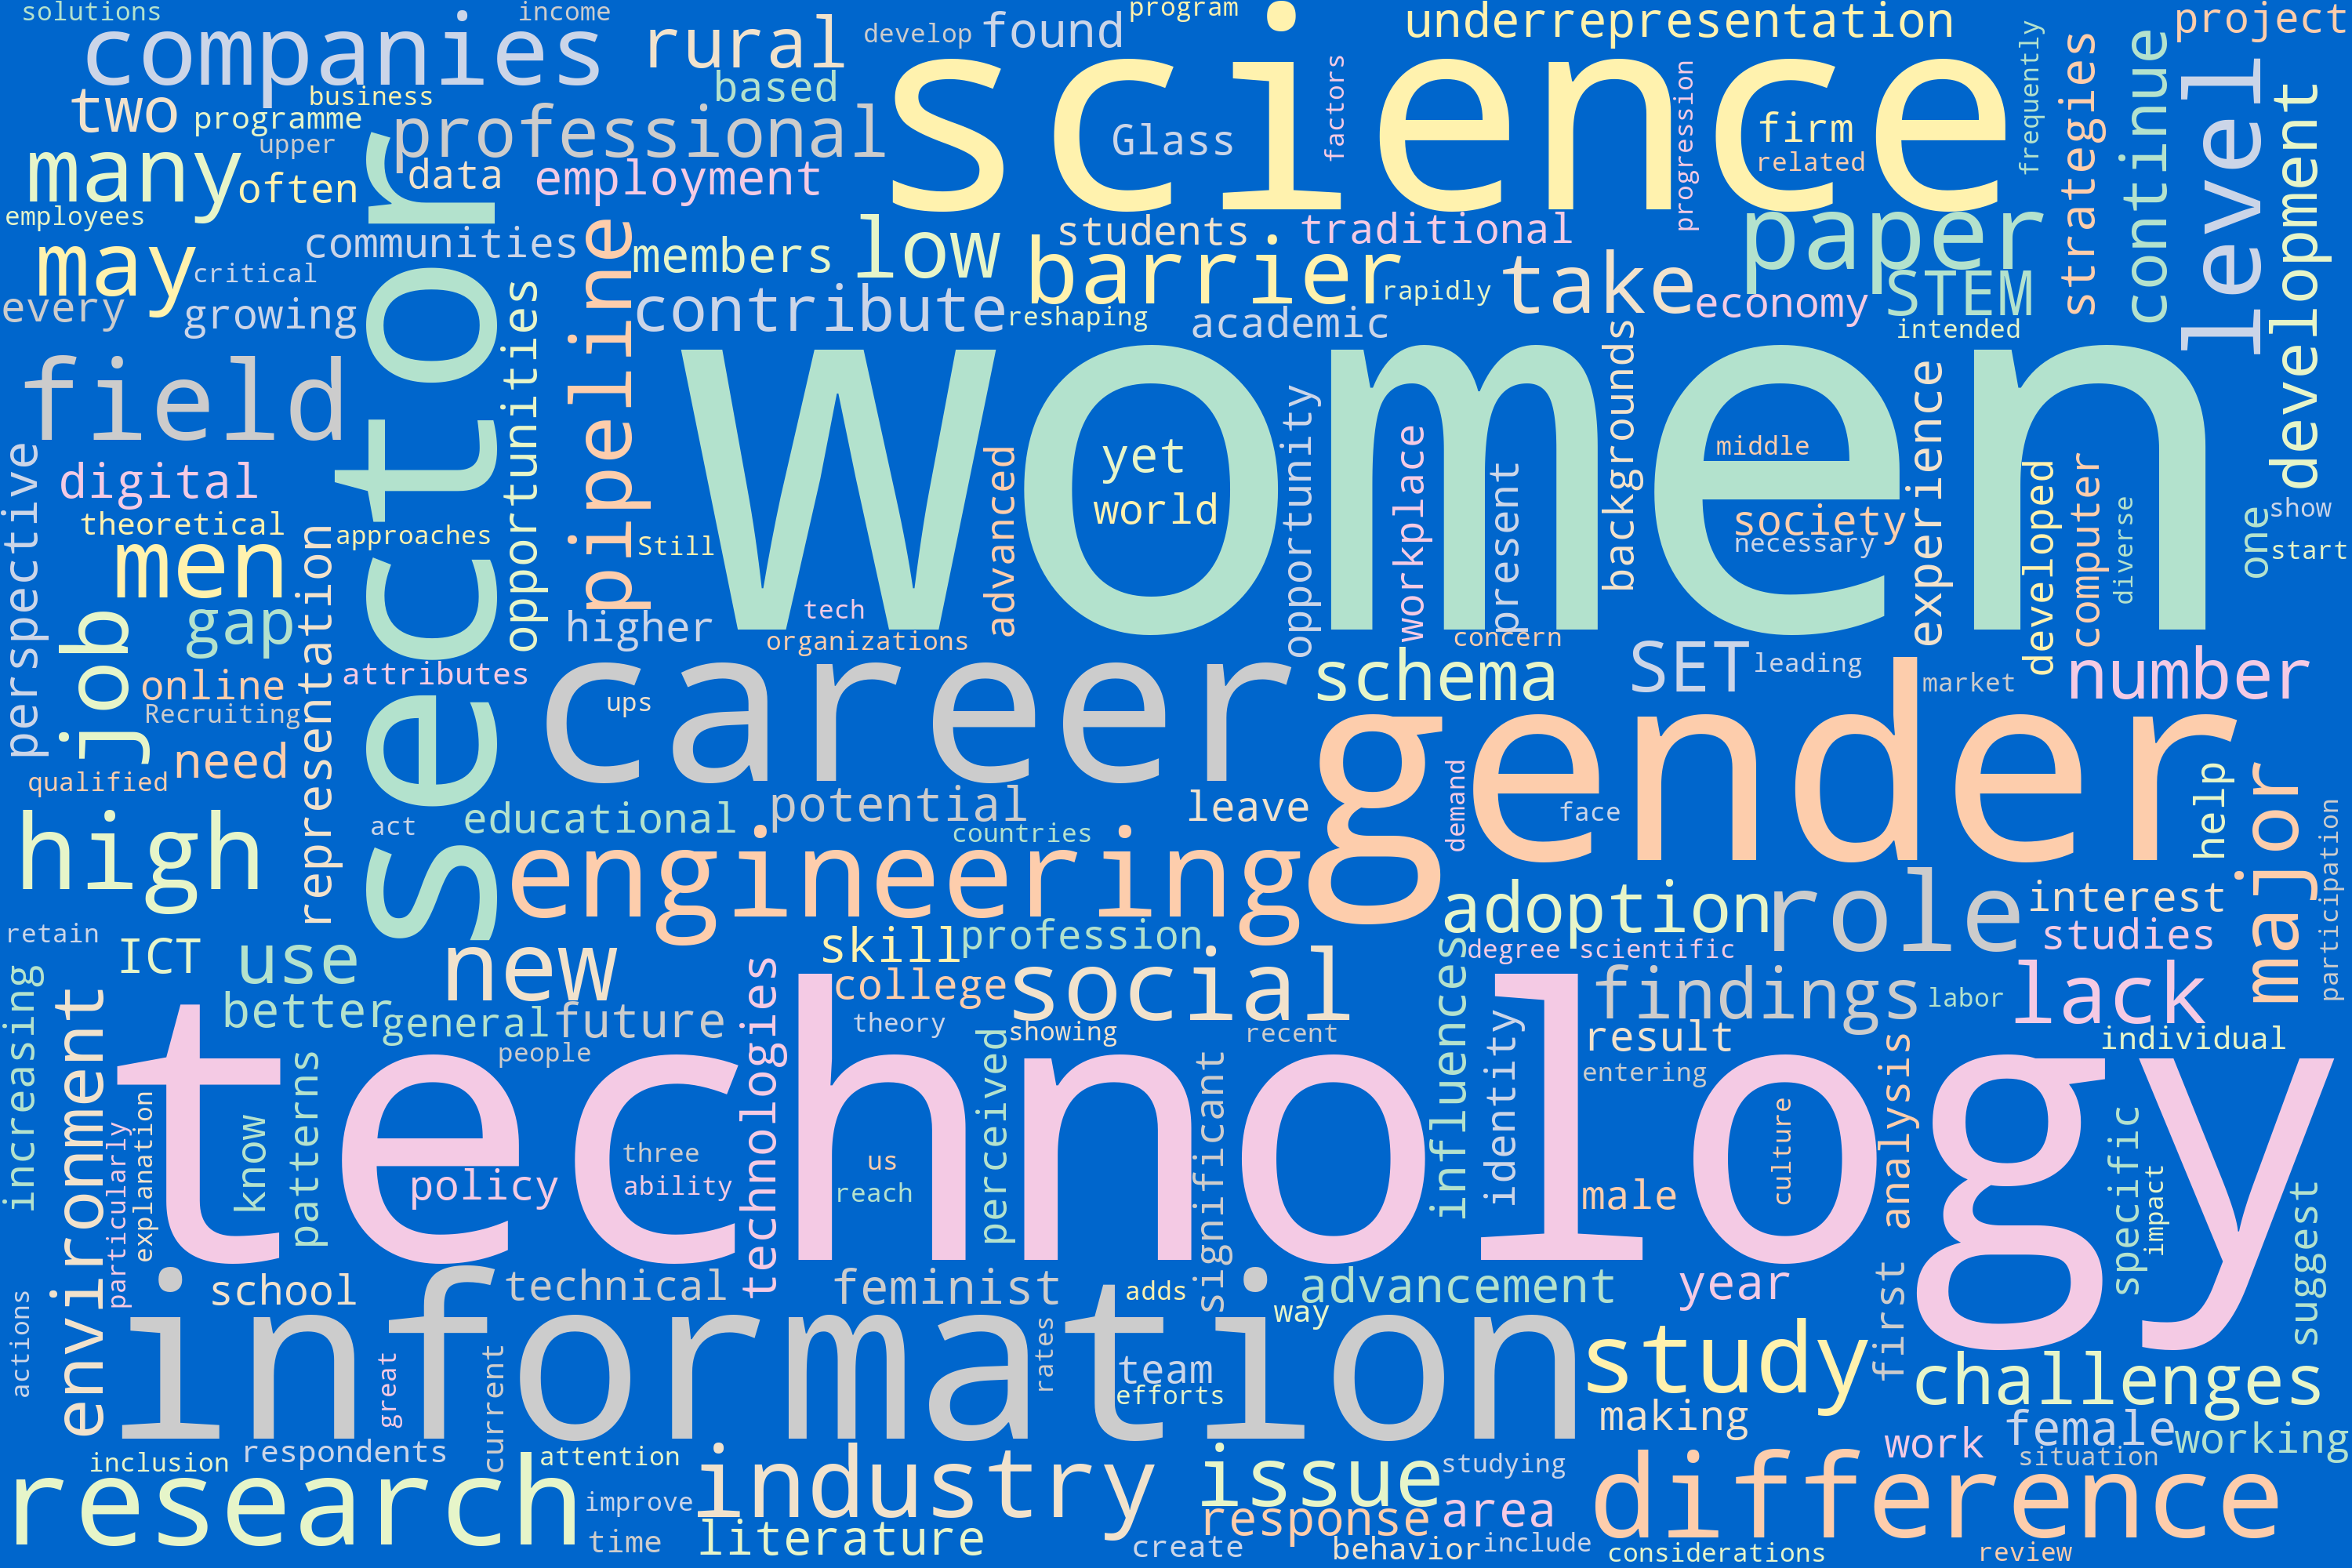

In [81]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [82]:
df.columns

Index(['Item type', 'Authors', 'Title', 'Journal', 'Publication year',
       'Volume', 'Issue', 'Pages', 'Institution', 'Publisher',
       'Proceedings title', 'Date published', 'Abstract'],
      dtype='object')

In [83]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [84]:
df_Title  = df['Title'].str.lower()

In [85]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'gender and engineering  developing actions to encourage women in tech  to succeed in tech, women need more visibility  women in science, engineering and technology  review of the issues  women in tech as driver for growth in emerging economies  women start-ups in technology  literature review and research agenda to improve participation  retaining women in technology  more women in tech  evidence from field experiment addressing social identity  gender schemas  cognitive explanation of discrimination of women in technology  why so few  women in science, technology, engineering, and mathematics  theorizing progress  women in science, engineering, and technology in higher education  perceived career challenges and response strategies of women in the advanced technology sector  technocapitalism meets technofeminism  women and technology in wireless world  puncturing the pipeline  do technology companies alienate women in recruiting sessions   technology adoption by rural women in queensl

In [86]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [87]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [88]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [89]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [90]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['gender',
 'and',
 'engineering',
 'developing',
 'action',
 'to',
 'encourage',
 'woman',
 'in',
 'tech',
 'to',
 'succeed',
 'in',
 'tech,',
 'woman',
 'need',
 'more',
 'visibility',
 'woman',
 'in',
 'science,',
 'engineering',
 'and',
 'technology',
 'review',
 'of',
 'the',
 'issue',
 'woman',
 'in',
 'tech',
 'a',
 'driver',
 'for',
 'growth',
 'in',
 'emerging',
 'economy',
 'woman',
 'start-ups',
 'in',
 'technology',
 'literature',
 'review',
 'and',
 'research',
 'agenda',
 'to',
 'improve',
 'participation',
 'retaining',
 'woman',
 'in',
 'technology',
 'more',
 'woman',
 'in',
 'tech',
 'evidence',
 'from',
 'field',
 'experiment',
 'addressing',
 'social',
 'identity',
 'gender',
 'schema',
 'cognitive',
 'explanation',
 'of',
 'discrimination',
 'of',
 'woman',
 'in',
 'technology',
 'why',
 'so',
 'few',
 'woman',
 'in',
 'science,',
 'technology,',
 'engineering,',
 'and',
 'mathematics',
 'theorizing',
 'progress',
 'woman',
 'in',
 'science,',
 'engineering,',
 'an

In [91]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['gender',
 'engineering',
 'developing',
 'action',
 'encourage',
 'woman',
 'tech',
 'succeed',
 'tech,',
 'woman',
 'need',
 'visibility',
 'woman',
 'science,',
 'engineering',
 'technology',
 'issue',
 'woman',
 'tech',
 'driver',
 'growth',
 'emerging',
 'economy',
 'woman',
 'start-ups',
 'technology',
 'literature',
 'research',
 'agenda',
 'improve',
 'participation',
 'retaining',
 'woman',
 'technology',
 'woman',
 'tech',
 'evidence',
 'field',
 'experiment',
 'addressing',
 'social',
 'identity',
 'gender',
 'schema',
 'cognitive',
 'explanation',
 'discrimination',
 'woman',
 'technology',
 'woman',
 'science,',
 'technology,',
 'engineering,',
 'mathematics',
 'theorizing',
 'progress',
 'woman',
 'science,',
 'engineering,',
 'technology',
 'higher',
 'education',
 'perceived',
 'career',
 'challenge',
 'response',
 'strategy',
 'woman',
 'advanced',
 'technology',
 'sector',
 'technocapitalism',
 'meet',
 'technofeminism',
 'woman',
 'technology',
 'wireless',
 'world'

In [92]:
import collections

In [93]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [94]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0          (woman, technology)       4
2            (woman, science,)       3
3          (technology, woman)       3
1                (woman, tech)       3
4         (technology, sector)       2
64  (sector, technocapitalism)       1
73       (technology, company)       1
72      (pipeline, technology)       1
71      (puncturing, pipeline)       1
70         (world, puncturing)       1
69           (wireless, world)       1
68      (technology, wireless)       1
67     (technofeminism, woman)       1
66      (meet, technofeminism)       1
65    (technocapitalism, meet)       1
61           (strategy, woman)       1
63      (advanced, technology)       1
62           (woman, advanced)       1
75           (alienate, woman)       1
60        (response, strategy)       1

In [95]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                    bigram &  counts \\
\midrule
       (woman, technology) &       4 \\
         (woman, science,) &       3 \\
       (technology, woman) &       3 \\
             (woman, tech) &       3 \\
      (technology, sector) &       2 \\
(sector, technocapitalism) &       1 \\
     (technology, company) &       1 \\
    (pipeline, technology) &       1 \\
    (puncturing, pipeline) &       1 \\
       (world, puncturing) &       1 \\
         (wireless, world) &       1 \\
    (technology, wireless) &       1 \\
   (technofeminism, woman) &       1 \\
    (meet, technofeminism) &       1 \\
  (technocapitalism, meet) &       1 \\
         (strategy, woman) &       1 \\
    (advanced, technology) &       1 \\
         (woman, advanced) &       1 \\
         (alienate, woman) &       1 \\
      (response, strategy) &       1 \\
     (challenge, response) &       1 \\
       (career, challenge) &       1 \\
       (perceived, career) &       1 \\
  

In [96]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('woman', 'technology')        |        4 |
| ('woman', 'science,')          |        3 |
| ('technology', 'woman')        |        3 |
| ('woman', 'tech')              |        3 |
| ('technology', 'sector')       |        2 |
| ('sector', 'technocapitalism') |        1 |
| ('technology', 'company')      |        1 |
| ('pipeline', 'technology')     |        1 |
| ('puncturing', 'pipeline')     |        1 |
| ('world', 'puncturing')        |        1 |
| ('wireless', 'world')          |        1 |
| ('technology', 'wireless')     |        1 |
| ('technofeminism', 'woman')    |        1 |
| ('meet', 'technofeminism')     |        1 |
| ('technocapitalism', 'meet')   |        1 |
| ('strategy', 'woman')          |        1 |
| ('advanced', 'technology')     |        1 |
| ('woman', 'advanced')          |        1 |
| ('alienate', 'woman')          |        1 |
| ('response', 'strategy')       |

In [97]:
title_bigram.to_csv("title_bigram.csv")

In [98]:
import networkx as nx

In [99]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [100]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [101]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

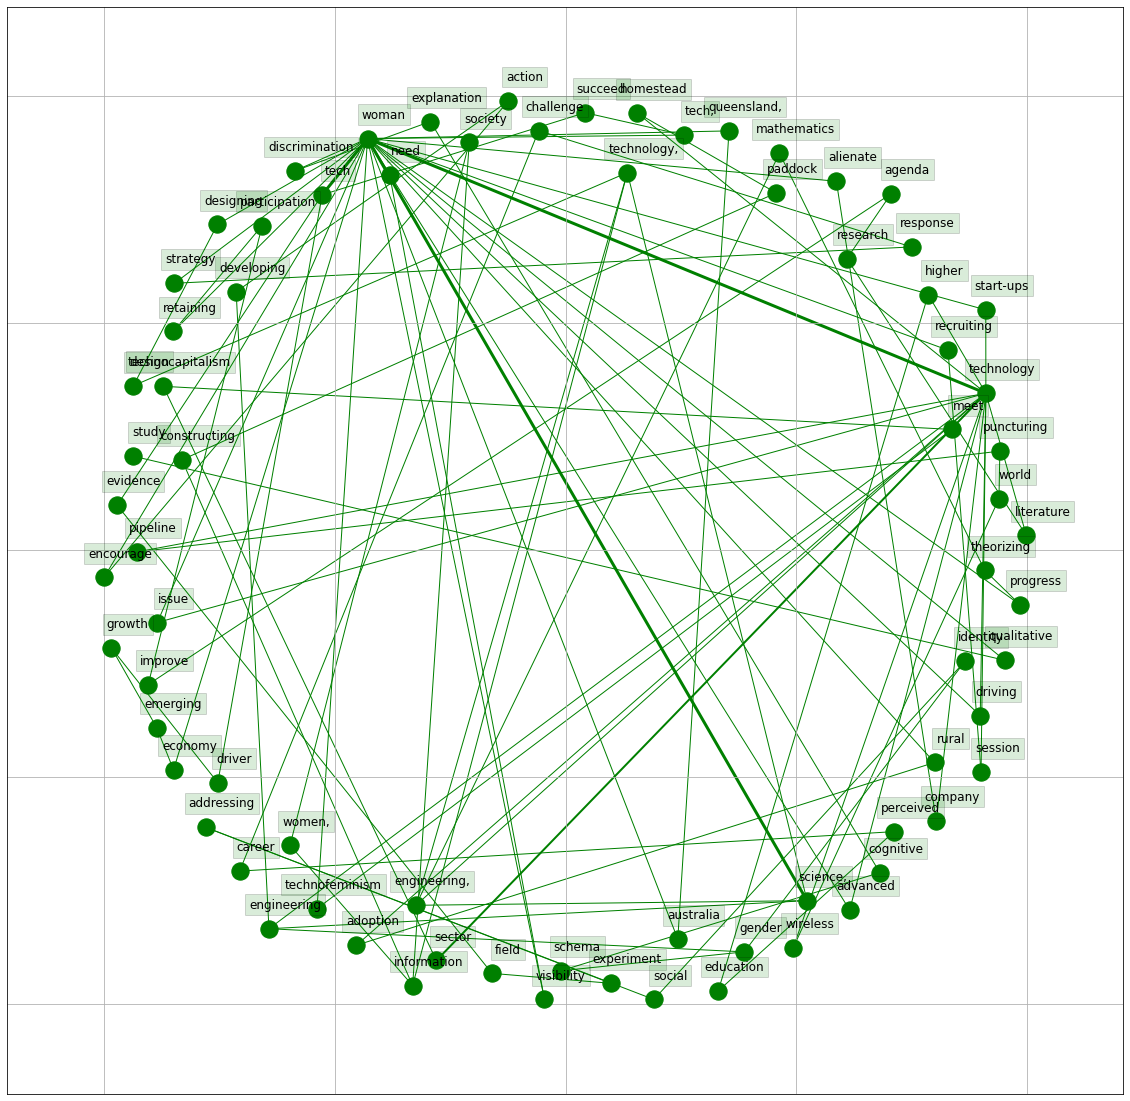

In [102]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [103]:
import igviz as ig

In [104]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [105]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-105-360256bff3c0>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.



## 2.2. Abstract

In [106]:
df_Abstract = df['Abstract'].str.lower()

In [107]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"there is social and economic concern for the low representativeness of women in the technology industry  the timeline of recent years shows drop in the interest of women in studying career related to science  technology  engineering and mathematics  stem   just when the demand labor in these fields is growing rapidly and new jobs will continue to emerge  and it is feared that they will not have enough people to cover it there are many social organizations that are taking measures to alleviate this situation  including educational branches  government agencies  industry and technological communities composed of women  in this research  the cases of industry and communities are studied  it is intended to dissect how these two ecosystems work to strengthen mechanisms that minimize the gender gap  on the one hand  the paper addresses  what are the communities  why they arise  what are their objectives  what they contribute to society and what actions they develop to contain the problem  r

In [108]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [109]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [110]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [111]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['there',
 'is',
 'social',
 'and',
 'economic',
 'concern',
 'for',
 'the',
 'low',
 'representativeness',
 'of',
 'woman',
 'in',
 'the',
 'technology',
 'industry',
 'the',
 'timeline',
 'of',
 'recent',
 'year',
 'show',
 'drop',
 'in',
 'the',
 'interest',
 'of',
 'woman',
 'in',
 'studying',
 'career',
 'related',
 'to',
 'science',
 'technology',
 'engineering',
 'and',
 'mathematics',
 'stem',
 'just',
 'when',
 'the',
 'demand',
 'labor',
 'in',
 'these',
 'field',
 'is',
 'growing',
 'rapidly',
 'and',
 'new',
 'job',
 'will',
 'continue',
 'to',
 'emerge',
 'and',
 'it',
 'is',
 'feared',
 'that',
 'they',
 'will',
 'not',
 'have',
 'enough',
 'people',
 'to',
 'cover',
 'it',
 'there',
 'are',
 'many',
 'social',
 'organization',
 'that',
 'are',
 'taking',
 'measure',
 'to',
 'alleviate',
 'this',
 'situation',
 'including',
 'educational',
 'branch',
 'government',
 'agency',
 'industry',
 'and',
 'technological',
 'community',
 'composed',
 'of',
 'woman',
 'in',
 'this'

In [112]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['social',
 'economic',
 'concern',
 'low',
 'representativeness',
 'woman',
 'technology',
 'industry',
 'timeline',
 'recent',
 'year',
 'show',
 'drop',
 'interest',
 'woman',
 'studying',
 'career',
 'related',
 'science',
 'technology',
 'engineering',
 'mathematics',
 'stem',
 'demand',
 'labor',
 'field',
 'growing',
 'rapidly',
 'new',
 'job',
 'continue',
 'emerge',
 'feared',
 'enough',
 'people',
 'cover',
 'many',
 'social',
 'organization',
 'taking',
 'measure',
 'alleviate',
 'situation',
 'including',
 'educational',
 'branch',
 'government',
 'agency',
 'industry',
 'technological',
 'community',
 'composed',
 'woman',
 'research',
 'case',
 'industry',
 'community',
 'studied',
 'intended',
 'dissect',
 'two',
 'ecosystem',
 'work',
 'strengthen',
 'mechanism',
 'minimize',
 'gender',
 'gap',
 'one',
 'hand',
 'paper',
 'address',
 'community',
 'arise',
 'objective',
 'contribute',
 'society',
 'action',
 'develop',
 'contain',
 'problem',
 'regarding',
 'company',
 

In [113]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [114]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0   (information, technology)       8
1      (science, engineering)       7
2         (woman, technology)       6
3        (technology, sector)       5
4       (science, technology)       4
9   (significant, difference)       3
12        (rural, technology)       3
10           (woman, science)       3
11      (career, advancement)       3
8            (gender, schema)       3
7         (computer, science)       3
6             (number, woman)       3
5              (high, school)       3
45      (technology, company)       2
36         (feminist, theory)       2
37    (better, understanding)       2
38       (perceived, barrier)       2
39          (barrier, career)       2
40     (advanced, technology)       2
41            (woman, member)       2
42      (woman, entrepreneur)       2
43    (educational, pipeline)       2
44       (environment, woman)       2
51       (opportunity, woman)       2
46          (plf, technology)       2

In [115]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                        bigram &  counts \\
\midrule
     (information, technology) &       8 \\
        (science, engineering) &       7 \\
           (woman, technology) &       6 \\
          (technology, sector) &       5 \\
         (science, technology) &       4 \\
     (significant, difference) &       3 \\
           (rural, technology) &       3 \\
              (woman, science) &       3 \\
         (career, advancement) &       3 \\
              (gender, schema) &       3 \\
           (computer, science) &       3 \\
               (number, woman) &       3 \\
                (high, school) &       3 \\
         (technology, company) &       2 \\
            (feminist, theory) &       2 \\
       (better, understanding) &       2 \\
          (perceived, barrier) &       2 \\
             (barrier, career) &       2 \\
        (advanced, technology) &       2 \\
               (woman, member) &       2 \\
         (woman, entrepreneur) &      

In [116]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                        |   counts |
|:------------------------------|---------:|
| ('information', 'technology') |        8 |
| ('science', 'engineering')    |        7 |
| ('woman', 'technology')       |        6 |
| ('technology', 'sector')      |        5 |
| ('science', 'technology')     |        4 |
| ('significant', 'difference') |        3 |
| ('rural', 'technology')       |        3 |
| ('woman', 'science')          |        3 |
| ('career', 'advancement')     |        3 |
| ('gender', 'schema')          |        3 |
| ('computer', 'science')       |        3 |
| ('number', 'woman')           |        3 |
| ('high', 'school')            |        3 |
| ('technology', 'company')     |        2 |
| ('feminist', 'theory')        |        2 |
| ('better', 'understanding')   |        2 |
| ('perceived', 'barrier')      |        2 |
| ('barrier', 'career')         |        2 |
| ('advanced', 'technology')    |        2 |
| ('woman', 'member')           |        2 |
| ('woman'

In [117]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [118]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [119]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

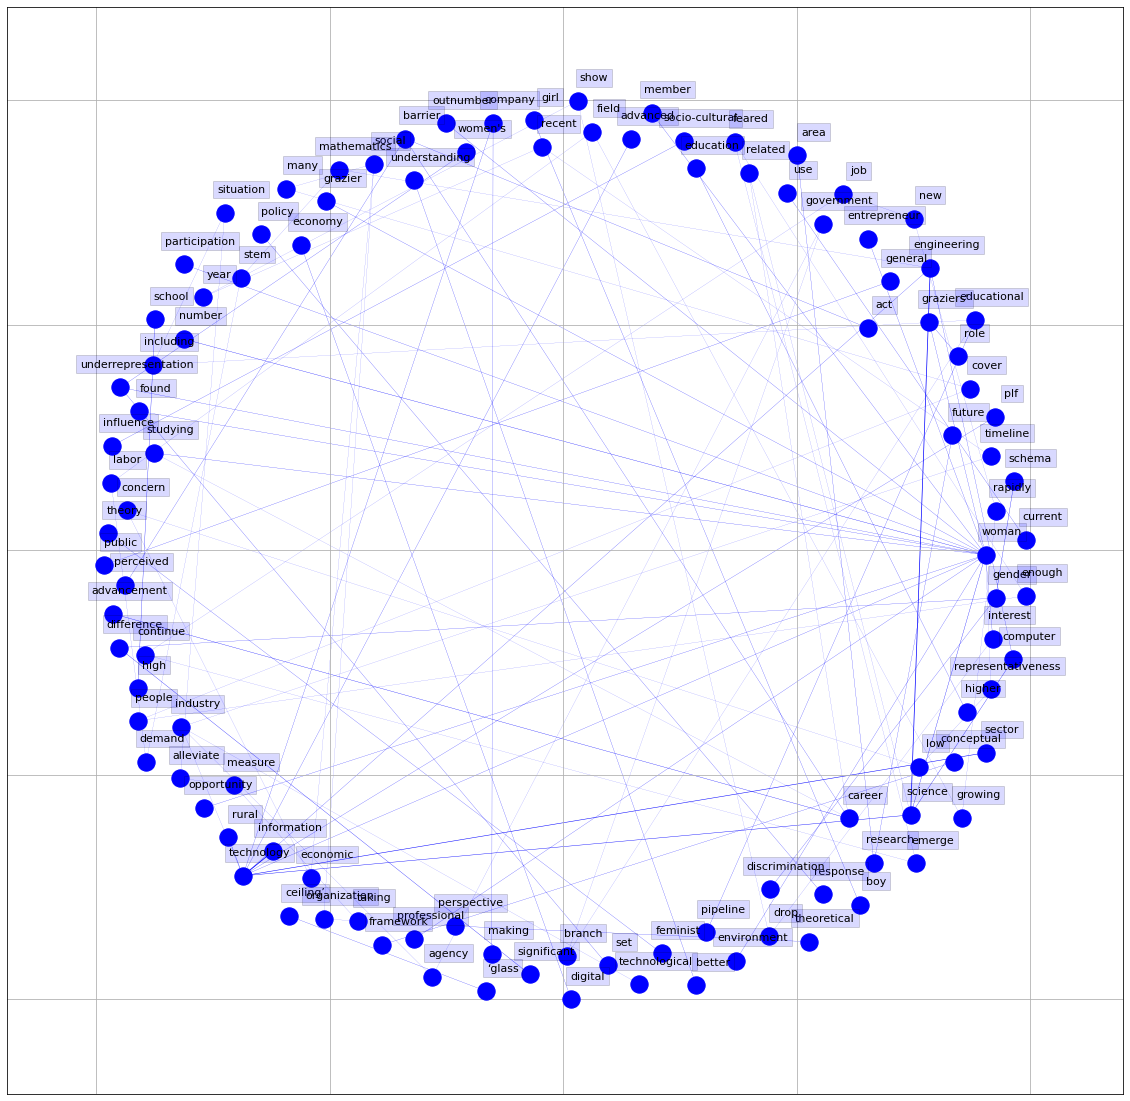

In [120]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [121]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [122]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-122-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

